# Transformació Registre Log amb Regular expressions

L'anàlisi de registres és una funció important per al control i l'alerta, el compliment de les polítiques de seguretat, l'auditoria i el compliment normatiu, la resposta a incidents de seguretat i fins i tot les investigacions forenses. En analitzar les dades de registre, les empreses poden identificar més fàcilment les possibles amenaces i altres problemes, trobar la causa arrel i iniciar una resposta ràpida per mitigar els riscos.

L'analista ha d'assegurar-se que els registres consisteixen en una gamma completa de missatges i s'interpreten segons el context. Els elements de registre han d'estandaritzar-se, utilitzant els mateixos termes o terminologia, per evitar confusions i proporcionar cohesió.

Com científic de dades se t'ha proporcionat accés als registres-Logs on queda registrada l'activitat de totes les visites a realitzades a la pàgina web de l'agència de viatges "akumenius.com".

In [1]:
import datetime
from ip2geotools.databases.noncommercial import DbIpCity
import pandas as pd
import re

import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

# Exercici 1

Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

In [2]:
# Carreguem el log
df = []
with open('Web_access_log-akumenius.com.txt') as fh:
    for line in fh:
        match = re.search('^([\w\.]+) (\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}) (\-) (\-|\w+) (\[.*?\]) \"(.*?)\" (\d+) (\-|\d+) \"(.*?)\" \"(.*?)\" (.*?)$', line)
        df.append([match.group(i) for i in range(1, 12)])
df = pd.DataFrame(df, columns=['server', 'ip', 'col3', 'col4', 'timestamp', 'http', 'code', 'port', 'url', 'client', 'vlog'])

In [3]:
# Visualitzem el log
df.head()

,server,ip,col3,col4,timestamp,http,code,port,url,client,vlog
0,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-


In [4]:
df.shape

(261873, 11)

In [5]:
# Identifiquem els atributs
for col in df.columns:
    print(col, df[col].nunique(), df[col].unique()[:5])

server 5 ['localhost' 'www.akumenius.com' 'akumenius.com' 'akumenius.es'
 'test.akumenius.com']
ip 2921 ['127.0.0.1' '66.249.76.216' '5.255.253.53' '157.55.35.112'
 '193.111.141.116']
col3 1 ['-']
col4 2 ['-' 'clarcat']
timestamp 118735 ['[23/Feb/2014:03:10:31 +0100]' '[23/Feb/2014:03:10:33 +0100]'
 '[23/Feb/2014:03:10:35 +0100]' '[23/Feb/2014:03:10:38 +0100]'
 '[23/Feb/2014:03:10:39 +0100]']
http 66764 ['OPTIONS * HTTP/1.0'
 'GET /hoteles-baratos/ofertas-hotel-Club-&-Hotel-Letoonia--en-Fethiye-8460b-destinos.html HTTP/1.1'
 'GET /hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html HTTP/1.1'
 'GET /hoteles-baratos/ofertas-hotel-Faena-Hotel-Buenos-Aires-en-Downtown-129723b-destinos.html HTTP/1.1'
 'GET /hoteles-baratos/ofertas-hotel-Kensington-Townhouse-London-en-Kensington-54356b-destinos.html HTTP/1.1']
code 12 ['200' '404' '304' '502' '301']
port 15548 ['-' '3100' '8811' '8816' '8810']
url 2507 ['-'
 'http://www.akumenius.com/hoteles-baratos/ofertas-hotel-P

In [6]:
df.timestamp.str.split(':').str.get(0).unique()

array(['[23/Feb/2014', '[24/Feb/2014', '[25/Feb/2014', '[26/Feb/2014',
       '[27/Feb/2014', '[28/Feb/2014', '[01/Mar/2014', '[02/Mar/2014'],
      dtype=object)

Els atributs que podem trobar a l'arxiu Web_access_log-akumenius.com són:
- **server**: hi ha 5 servidors registrats en el log: localhost, www.akumenius.com, akumenius.com, akumenius.es, test.akumenius.com
- **ip**: hi ha 2921 IPs en el registre, entre elles el localhost (127.0.0.1) o 157.55.35.112.
- **columna 3**: només pren el valor -
- **columna 4**: només pren el valor - o clarcat
- **timestamp**: ens diu el dia, hora i zona horària. Hi ha 118735 registres diferents, des del 23 de febrer del 2014 fins al 2 de març del 2014.
- **http**: ens indica el protocol d'http, el mètode d'http i la url. Hi ha 66764 registres diferents amb valors com OPTIONS * HTTP/1.0 o GET /hoteles-baratos/ofertas-hotel-Metropolis-Hotel-en-Kaunas-210244b-destinos.html HTTP/1.1.
- **code**: és el codi http del servidor. Hi ha 12 codis diferents amb valors com 200 (successful) o 404 (not found).
- **port**: port del servidor. Hi ha 15548 registres diferents amb valor númeric (8810, 88816) o sense indicar (-).
- **url**: URL on accedeix el client. Hi ha 2507 registres diferents, alguns sense indicar (-) i altres amb valors com http://www.akumenius.com/faq o http://www.akumenius.com/login-registerHome.
- **client**: navegador i pàgina d'accés del client. Hi h 735 registres diferents amb valors com Apache (internal dummy connection) o 'Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)
- **vlog**: només pren el valor VLOG=-

# Exercici 2

Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

In [7]:
# Formategem la columna timestamp
def clean_timestamp(ts):
    datehour, timezone = ts.lstrip('[').rstrip(']').split()
    timestamp = datetime.datetime.strptime(datehour, '%d/%b/%Y:%H:%M:%S')
    timestamp.replace(tzinfo=datetime.timezone(datetime.timedelta(hours=int(timezone[:3]))))
    return timestamp

df['timestamp_clean'] = df.apply(lambda row: clean_timestamp(row.timestamp), axis=1)

In [8]:
# Netegem la columna http en mètode, petició i protocol
df[['metode', 'petició', 'protocol']] = df.apply(lambda row: pd.Series(row.http.split(' ')), axis=1)

In [9]:
df.head()

,server,ip,col3,col4,timestamp,http,code,port,url,client,vlog,timestamp_clean,metode,petició,protocol
0,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31,OPTIONS,*,HTTP/1.0
1,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31,OPTIONS,*,HTTP/1.0
2,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31,OPTIONS,*,HTTP/1.0
3,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31,OPTIONS,*,HTTP/1.0
4,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31 +0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-,2014-02-23 03:10:31,OPTIONS,*,HTTP/1.0


# Exercici 3

Geolocalitza les IP's.

In [10]:
# Extracció del top 10 d'IPs més visitades
ips10 = df[df.ip!='127.0.0.1'].ip.value_counts().head(10).rename_axis('IP').reset_index(name='count')
ips10

,IP,count
0,66.249.76.216,46382
1,80.28.221.123,14725
2,217.125.71.222,5201
3,66.249.75.148,3558
4,162.243.192.191,2927
5,62.117.197.230,2567
6,89.128.176.162,1093
7,198.143.133.154,1045
8,176.31.255.177,1044
9,80.58.250.94,1043


In [11]:
# Geolocalització del top 10 d'IPs
def get_geolocalization(ip):
    petition=DbIpCity.get(ip,api_key='free')
    return pd.Series([petition.latitude, petition.longitude, petition.city, petition.region, petition.country])

ips10[['latitud', 'longitud', 'ciutat', 'regió', 'país']] = ips10.IP.apply(get_geolocalization)

In [12]:
ips10

,IP,count,latitud,longitud,ciutat,regió,país
0,66.249.76.216,46382,37.389389,-122.083210,Mountain View,California,US
1,80.28.221.123,14725,40.416705,-3.703582,Madrid,Madrid,ES
2,217.125.71.222,5201,40.416705,-3.703582,Madrid,Madrid,ES
3,66.249.75.148,3558,37.389389,-122.083210,Mountain View,California,US
4,162.243.192.191,2927,40.712728,-74.006015,New York,New York,US
5,62.117.197.230,2567,37.992379,-1.130543,Murcia,Murcia,ES
6,89.128.176.162,1093,40.434653,-3.814834,Pozuelo de Alarcón,Madrid,ES
7,198.143.133.154,1045,42.021578,-88.183000,Chicago (Loop),Illinois,US
8,176.31.255.177,1044,50.691589,3.174173,Roubaix,Hauts-de-France,FR
9,80.58.250.94,1043,40.416705,-3.703582,Madrid,Madrid,ES


# Exercici 4

Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [14]:
points = ips10.apply(lambda row: Point(row.longitud, row.latitud), axis=1)
geo_df = gpd.GeoDataFrame(points, crs={'init':'epsg:4326'}, geometry=points)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

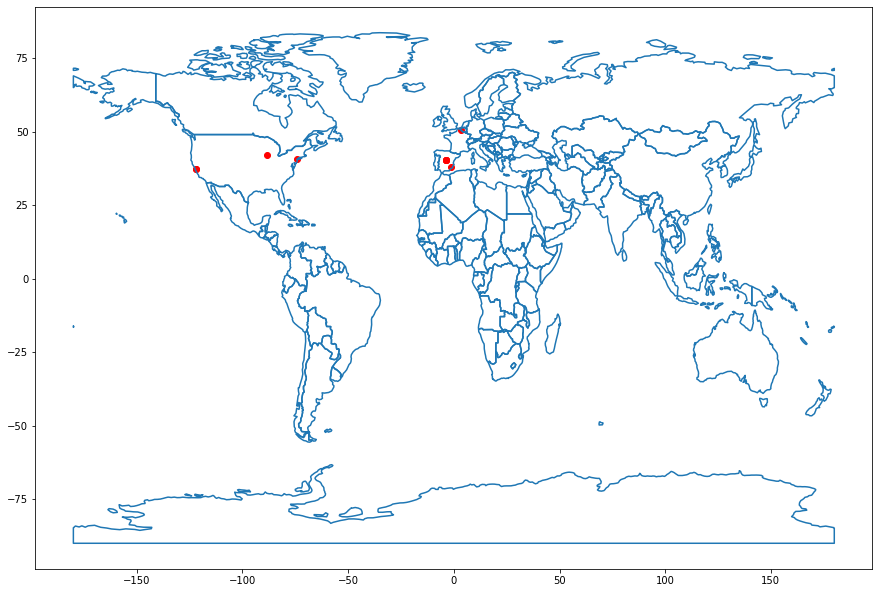

In [15]:
fig, ax = plt.subplots(figsize=(15,15))
world.boundary.plot(ax=ax)
geo_df.plot(ax=ax, color='red')